  # Multi Linear Regression

# *Lets Start Guys*

## import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [7]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
URL = 'https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv'


## Read data

In [9]:
Data = pd.read_csv(URL)

In [10]:
Data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# EDA

In [11]:
Data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [13]:
Data.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [14]:
Data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [15]:
Feature  = Data[['ENGINESIZE',
                 'CYLINDERS',
                 'FUELCONSUMPTION_CITY',
                 'FUELCONSUMPTION_HWY',
                 'FUELCONSUMPTION_COMB',
                 'FUELCONSUMPTION_COMB_MPG']]
Feature

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24
1063,3.2,6,13.2,9.5,11.5,25
1064,3.0,6,13.4,9.8,11.8,24
1065,3.2,6,12.9,9.3,11.3,25


In [16]:
Target = Data['CO2EMISSIONS']
Target.head()


0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

# Lets train our model


In [17]:
### Train The Model
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_Test,Y_Train, Y_Test = train_test_split(Feature,Target)  # Randomly Select the Data 
X_train.shape

(800, 6)

# Multiple Linear Regression

### yi=β0+β1xi,1+β2xi,2+… +βkxi

In [19]:
from sklearn.linear_model import LinearRegression   # Importing the model

In [20]:
Model = LinearRegression(normalize=True)    # Callin the Model From Scikit-Learn
Model.fit(X_train,Y_Train)         # Fiting thr Data


LinearRegression(normalize=True)

In [21]:
Model.coef_   # Slopes of Stright Line

array([ 8.90410222,  7.20452929, -2.36735354,  3.36890401,  3.11350513,
       -3.82336307])

In [22]:
Model.intercept_ #intercept Point In Y axis

249.9174897320586

In [35]:
Model.predict([[2.0,4,9.9,6.7,8.5,33]])

array([195.97248031])

In [24]:
New_prediction = Model.predict(X_Test)

## *Error = Actual - Predicted*

In [25]:
pd.DataFrame({"Actual_Data":Y_Test,
             "New_Predication":New_prediction,
             "Error":Y_Test-New_prediction}) 

,Actual_Data,New_Predication,Error
185,262,261.885881,0.114119
453,271,278.040564,-7.040564
218,362,384.356128,-22.356128
303,237,250.623110,-13.623110
55,262,259.511704,2.488296
...,...,...,...
1057,232,233.093230,-1.093230
846,198,196.701145,1.298855
221,380,345.636995,34.363005
202,177,172.381413,4.618587


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

Calculating the mean error helps us understand how far off our predictions are on average. If the mean error is small, then our predictions are generally close to the actual values. If the mean error is large, then our predictions are often far from the actual values


Mean Absolute Error(MAE) is the mean size of the mistakes in collected predictions. We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. The absolute difference means that if the result has a negative sign, it is ignored.

# MSE = (1/n) * Σ(yi - ŷi)^2

# MAE = (1/n) * Σ|yi - ŷi|


## n is the number of observations
## yi is the actual value of the dependent variable for observation i
## ŷi is the predicted value of the dependent variable for observation i
## |.| denotes the absolute value

In [27]:
mean_squared_error(Y_Test,New_prediction) # Total Mean Error

453.9126165846035

In [28]:
mean_absolute_error(Y_Test,New_prediction)

13.951986503532115

In [29]:
Train_Score = Model.score(X_train,Y_Train)
print("Train Score of a Model is : {}".format(Train_Score))

Train Score of a Model is : 0.8911580658979893



## A multiple linear regression model with a train score of 0.89 can be considered a good model.

### A score of 0.89 indicates that the model explains 89% of the variability in the training data. 

#### variabiliy= spread of data








# Lets talk about the Cross Validation

 cross-validation in machine learning is to evaluate the performance of a model

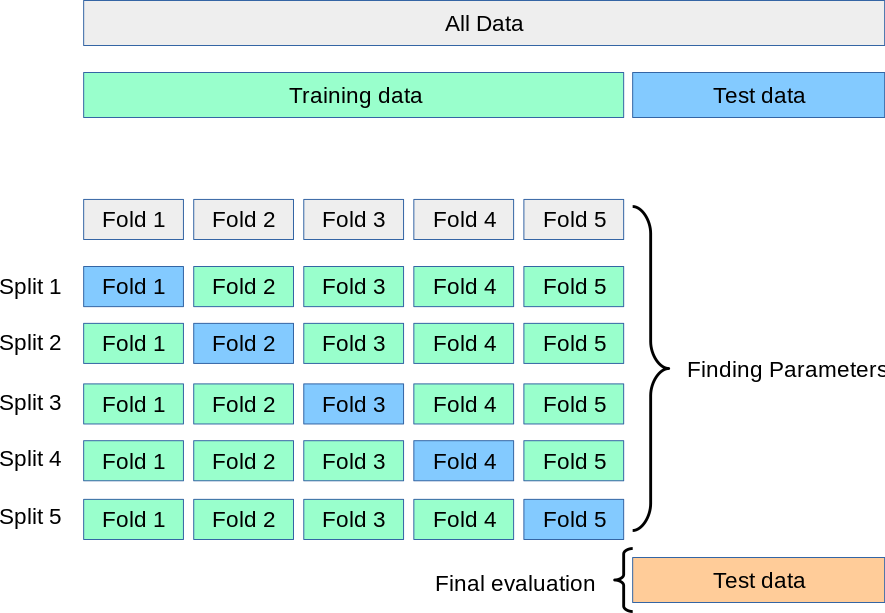

# Types

# 1)Leave One Out CV 
# 2)K-Fold CV

In [30]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(Model, X_train,Y_Train,cv = 20)
cv

array([0.81307256, 0.87058102, 0.80683022, 0.92312349, 0.87917247,
       0.85734859, 0.90342049, 0.84838175, 0.83794687, 0.89292598,
       0.88695647, 0.90230872, 0.89917357, 0.93828532, 0.88242484,
       0.90299837, 0.91135626, 0.86997729, 0.92731097, 0.92706748])

In [31]:
np.mean(cv)

0.8840331361655481

In [32]:
np.max(cv)

0.9382853231325626

In [33]:
np.min(cv)

0.8068302156918118

## Summary of the Class

#### Data Loading

#### EDA

#### Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)

#### Model Selection for Train and Testing porcess Spliting the Data in to 75% For Train and 25% Testing

#### Apply the linear Regression Model

#### Fit the Model

#### New_predication

#### Comparing the Actual Data and New predication and find the Error

#### Find the Train Score and Test Score

#### Final Find the Overall Error in the data

#### Cross Validating the Model

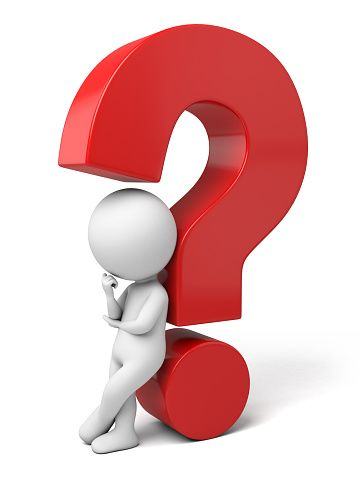